In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
# generate data
np.random.seed(42)
df = pd.DataFrame(np.random.normal(0 ,1, (100, 2)))
df.columns = ['x', 'y']
x, y = df['x'], df['y']

In [3]:
# develop linear regression model for comparison
fit = np.polyfit(x, y, deg=1)
_x = np.linspace(x.min(), x.max(), len(y))

In [4]:
# develop quantile regression model for six quantiles
model = sm.quantreg('y ~ x', df)
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
fits = [model.fit(q=q) for q in quantiles]

In [5]:
# the quantile lines
_y_005 = fits[0].params['x'] * _x + fits[0].params['Intercept']
_y_095 = fits[5].params['x'] * _x + fits[5].params['Intercept']

In [6]:
# start and end points for the quantile lines
p = np.column_stack((x, y))
a = np.array([_x[0], _y_005[0]])
b = np.array([_x[-1], _y_005[-1]])
a_ = np.array([_x[0], _y_095[0]])
b_ = np.array([_x[-1], _y_095[-1]])

In [7]:
# mask for coordinates above and below the quantile lines
mask = (lambda p, a, b, a_, b_: (np.cross(b-a, p-a) > 0) & (np.cross(b_-a_, p-a_) < 0))(
    p, a, b, a_, b_
)

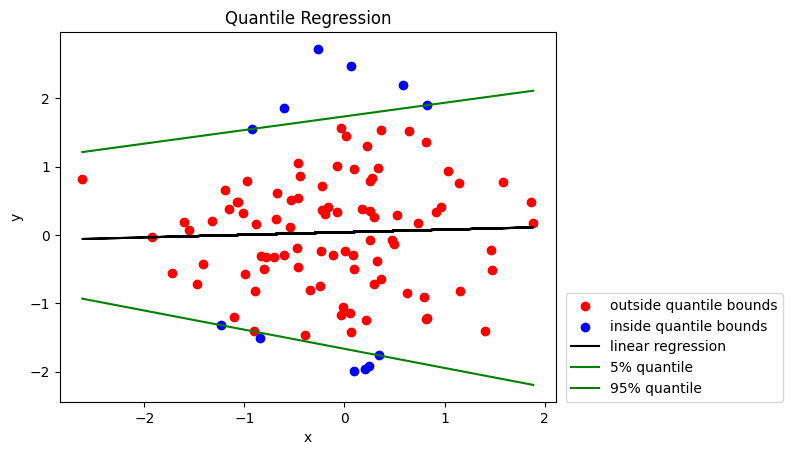

In [8]:
# plot
_, axes = plt.subplots()
_ = axes.scatter(x[mask], y[mask], color='red', label='outside quantile bounds')
_ = axes.scatter(x[~mask], y[~mask], color='blue', label='inside quantile bounds')
_ = axes.plot(x, fit[0] * x + fit[1], color='black', label='linear regression')
_ = axes.plot(_x, _y_005, color='green', label='5% quantile')
_ = axes.plot(_x, _y_095, color='green', label='95% quantile')
_ = axes.legend(loc=(1.02, 0))
_ = axes.set_title('Quantile Regression')
_ = axes.set_xlabel('x')
_ = axes.set_ylabel('y')